## CSE676: Deep Learning 
### Project: Sentiment analysis on IMDb Movie Reviews dataset
### Sanchit Krishna Anandraj , Abhinandan Vijan , Satvik Singh

## Importing relevant libaries to perform cleaning and EDA steps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
from collections import Counter

## Reading data from a csv file and store it in a pandas data frame.

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

## Data Statistics

In [3]:
df.shape

(50000, 2)

In [4]:
df.dtypes

review       object
sentiment    object
dtype: object

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


## Handling mising data

In [7]:
missing_data = df.isnull().sum()
print(missing_data)

review       0
sentiment    0
dtype: int64


In [8]:

print(df['review'].duplicated().sum())

418


In [9]:
# Remove duplicates
df.drop_duplicates(inplace=True)


In [10]:
df.shape

(49582, 2)

## Encoding the target column

In [11]:
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative': 0})

In [12]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


## Visualizing sentiment distribution

In [13]:
pos_count = df['sentiment'].eq(1).sum()
neg_count = df['sentiment'].eq(0).sum()

print("positive sentiment count",  pos_count )
print("negative sentiment count",  neg_count )


positive sentiment count 24884
negative sentiment count 24698


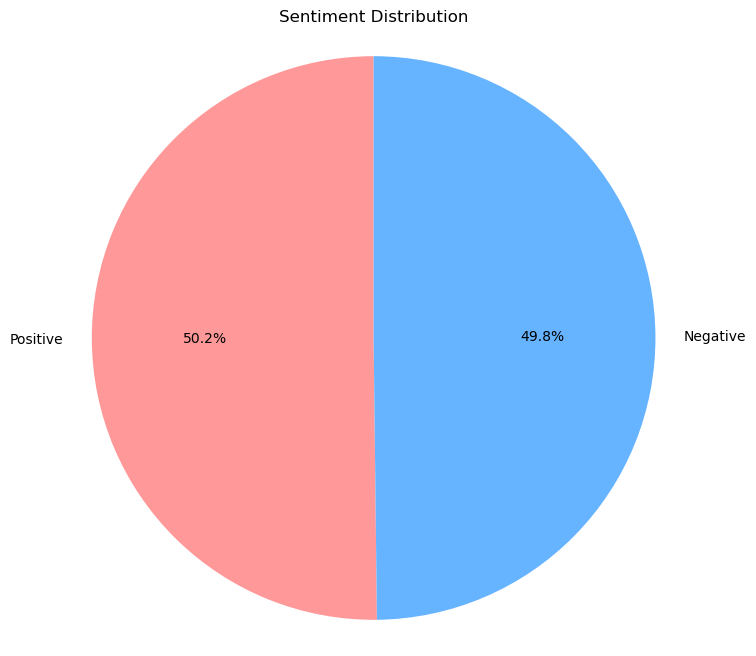

In [14]:
# Calculate the value counts for each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle=90, colors= ['#ff9999','#66b3ff'])
plt.title('Sentiment Distribution')
plt.axis('equal') 
plt.show()


In [ ]:
positive_reviews = df[df['sentiment'] == 1]
positive_text = ' '.join(positive_reviews['review'])
wordcloud = WordCloud(max_words=100, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Reviews')
plt.show()

In [ ]:

positive_text = ' '.join(positive_reviews['review'])
word_counts = Counter(positive_text.split())

common_words = word_counts.most_common(100)

common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
common_words_df



In [ ]:
negative_reviews = df[df['sentiment'] == 0]
negative_text = ' '.join(negative_reviews['review'])
wordcloud = WordCloud(max_words=100, background_color='white').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative Reviews')
plt.show()

In [ ]:
negative_reviews = df[df['sentiment'] == 0]
negative_text = ' '.join(negative_reviews['review'])
word_counts = Counter(negative_text.split())

common_words = word_counts.most_common(100)

# Convert to DataFrame for better visualization (optional)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
common_words_df



In [ ]:
df['review_length'] = df['review'].apply(len)

positive_reviews = df[df['sentiment'] == 1]
negative_reviews = df[df['sentiment'] == 0]

# Plot histograms for positive and negative reviews in a single plot
plt.figure(figsize=(10, 7))
plt.hist(positive_reviews['review_length'], bins=90, color='green', alpha=0.5, label='Positive Reviews')
plt.hist(negative_reviews['review_length'], bins=90, color='red', alpha=0.5, label='Negative Reviews')

plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.xlim(0, 7000)
plt.legend()
plt.show()

## Splitting the dataset 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df['review'], df['sentiment'], test_size = 0.2)

In [ ]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),                                                   
    ('random_forest', (RandomForestClassifier(n_estimators=10, criterion='entropy')))      
])

clf.fit(X_train, Y_train)

In [ ]:
import seaborn as sns
Y_pred = clf.predict(X_test)
print('Classification Report:\n',classification_report(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('vectorizer', CountVectorizer()),                                                   
    ('NB', MultinomialNB())      
])

clf.fit(X_train, Y_train)

In [ ]:
Y_pred = clf.predict(X_test)
print('Classification Report:\n',classification_report(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True)
plt.show()

# LSTM - Long Short Term Memory Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Step 1: Data Preprocessing
def preprocess_data(df, num_words=5000, maxlen=200, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size, random_state=42)
    
    tokenizer = Tokenizer(num_words=num_words)
    tokenizer.fit_on_texts(train_data["review"])
    
    X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=maxlen)
    X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=maxlen)
    
    Y_train = train_data["sentiment"].values
    Y_test = test_data["sentiment"].values
    
    return X_train, X_test, Y_train, Y_test, tokenizer

In [ ]:
# Step 2: Model Building
def build_model(input_dim, output_dim=128, maxlen=200):
    model = Sequential()
    model.add(Input(shape=(maxlen,)))
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# Step 3: Model Training
def train_model(X_train, Y_train, input_dim, epochs=25, batch_size=64):
    model = build_model(input_dim=input_dim)
    history = model.fit(X_train, Y_train, 
                        epochs=epochs, 
                        batch_size=batch_size, 
                        validation_split=0.2,
                        verbose=1)
    return model, history

In [ ]:
# Step 4: Evaluation and Plotting
def plot_metrics(history, X_train, Y_train, X_test, Y_test, model):
    train_loss, train_accuracy = model.evaluate(X_train, Y_train, verbose=0)
    test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)

    # Adjust to reflect only the final values for train and test
    history.history['train_loss_final'] = [train_loss]
    history.history['train_accuracy_final'] = [train_accuracy]
    history.history['test_loss_final'] = [test_loss]
    history.history['test_accuracy_final'] = [test_accuracy]

    # Plot training & test accuracy values
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot([train_accuracy] * len(history.history['accuracy']), label='Train Accuracy (Final)', linestyle='--')
    plt.plot([test_accuracy] * len(history.history['accuracy']), label='Test Accuracy (Final)', linestyle='--')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & test loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot([train_loss] * len(history.history['loss']), label='Train Loss (Final)', linestyle='--')
    plt.plot([test_loss] * len(history.history['loss']), label='Test Loss (Final)', linestyle='--')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

In [ ]:
def evaluate_model(model, X_test, Y_test):
    Y_pred = (model.predict(X_test) > 0.5).astype("int32")
    
    print('Classification Report:\n', classification_report(Y_test, Y_pred))

    # Plotting confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
def plot_roc_curve(model, X_test, Y_test):
    # Predict probabilities
    Y_pred_prob = model.predict(X_test)

    # Compute ROC curve and ROC area for positive class
    fpr_pos, tpr_pos, _ = roc_curve(Y_test, Y_pred_prob)
    roc_auc_pos = auc(fpr_pos, tpr_pos)

    # Compute ROC curve and ROC area for negative class
    fpr_neg, tpr_neg, _ = roc_curve(1 - Y_test, 1 - Y_pred_prob)
    roc_auc_neg = auc(fpr_neg, tpr_neg)

    # Plot ROC curves
    plt.figure(figsize=(12, 6))

    # Positive class
    plt.subplot(1, 2, 1)
    plt.plot(fpr_pos, tpr_pos, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_pos)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Positive Class')
    plt.legend(loc="lower right")

    # Negative class
    plt.subplot(1, 2, 2)
    plt.plot(fpr_neg, tpr_neg, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_neg)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Negative Class')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

In [ ]:
if __name__ == "__main__":

    X_train, X_test, Y_train, Y_test, tokenizer = preprocess_data(df)

    model, history = train_model(X_train, Y_train, input_dim=5000)

In [ ]:
evaluate_model(model, X_test, Y_test)

In [ ]:
plot_metrics(history, X_train, Y_train, X_test, Y_test, model)

In [ ]:
plot_roc_curve(model, X_test, Y_test)

In [ ]:
model.summary()

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Loss: ",loss)
print("Accuracy: ",accuracy)

In [ ]:
def predictive_system(review):
  sequences = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequences, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

# Real Case Movie Review

Honestly, giving this a second viewing, I really hope we get a completed sequel trilogy. 
I mean the movie predicted it’s own backlash within the movie. 
It does what the first movie did, and mirrors society and the system we live in. 
It literally states “people have given up, and just choose to live in the system.” 
The fact that people attack this movie (and many others) for being “too woke” blows my mind. 
It’s literally people being vocal about not wanting to wake up. 
The movie def has its flaws, but what movie doesn’t? Idk, I love all of the Matrix movies. 
Give me two more and I’ll be happy.

In [ ]:
predictive_system("Honestly, giving this a second viewing, I really hope we get a completed sequel trilogy. I mean the movie predicted it’s own backlash within the movie. It does what the first movie did, and mirrors society and the system we live in. It literally states “people have given up, and just choose to live in the system.” The fact that people attack this movie (and many others) for being “too woke” blows my mind. It’s literally people being vocal about not wanting to wake up. The movie def has its flaws, but what movie doesn’t? Idk, I love all of the Matrix movies. Give me two more and I’ll be happy.")

# Real Case Movie Review

This movie is absolutely terrible. The directing, acting, script and production are all bad. 
There is actually NOTHING redeemable about it. In fact if MY friend was in this movie, instead of giving it a perfect score, I'd stop being friends with them. 
That's how bad it is. YOU HAVE BEEN WARNED DO NOT WASTE YOUR TIME ON THIS MOVIE.

In [ ]:
predictive_system("This movie is absolutely terrible. The directing, acting, script and production are all bad. There is actually NOTHING redeemable about it. In fact if MY friend was in this movie, instead of giving it a perfect score, I'd stop being friends with them. That's how bad it is. YOU HAVE BEEN WARNED DO NOT WASTE YOUR TIME ON THIS MOVIE.")